## trocr-mfr-printed 10K数据集预处理

In [1]:
import random
import re
import os
from IPython.display import display
from PIL import Image

import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F

from transformers import TrOCRProcessor
from optimum.onnxruntime import ORTModelForVision2Seq
from datasets import Dataset

c:\ProgramData\anaconda3\envs\PyTorch\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


先读取本地的图片数据集

In [4]:
trian_img_directory = r'C:\Users\EDY\Desktop\AI-team\MFR-printed\pics10K\data\data0508\original_train'
train_label_file = r'C:\Users\EDY\Desktop\AI-team\MFR-printed\pics10K\data\data0508\original_train\train.txt'

In [2]:
def img_dir_2_dict(directory):
    images = dict()
    for filename in os.listdir(directory):
        if filename.endswith('.png'):
            image_path = os.path.join(directory, filename)
            image = Image.open(image_path)
            images[filename[:-4]] = image
    
    return images

def split_label_dict(file):
    # 正则表达式解释：
    # (.*) 表示匹配任意字符（除换行符）0次或多次，并捕获这部分内容。
    # \.png 匹配字符串 ".png"，注意\.用于匹配实际的点字符，因为点在正则表达式中是特殊字符。
    pattern = r'(.*)(\.png\t)(.*)'
    labels = dict()

    with open(file, 'r', encoding='utf-8') as f:
        lines = f.readlines()
        for line in lines:
            match = re.match(pattern, line)
            if match:
                before_png, png, after_png = match.groups()
                labels[before_png] = after_png
    
    return labels

In [11]:
train_img = img_dir_2_dict(trian_img_directory)

读取8000张图片要1m11s，能否有更高效的读取或存储方法。以后训练用的数据规模将达到数十万。

In [12]:
train_img

{'first_absolute_value_1': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=216x62>,
 'first_absolute_value_10': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=254x71>,
 'first_absolute_value_11': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=269x61>,
 'first_absolute_value_12': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=242x101>,
 'first_absolute_value_14': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=258x126>,
 'first_absolute_value_15': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=282x87>,
 'first_absolute_value_16': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=252x157>,
 'first_absolute_value_17': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=473x93>,
 'first_absolute_value_19': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=231x67>,
 'first_absolute_value_2': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=288x56>,
 'first_absolute_value_22': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=255x72>,
 'first_a

In [15]:
train_label = split_label_dict(train_label_file)
train_label

{'second_tri_trigonometric_function_96': '\\frac { \\cos \\left ( \\pi - \\theta \\right ) + \\sin \\left ( \\pi - \\theta \\right ) } { 2 \\sin \\theta - \\cos \\theta } = \\left (  \\right )',
 'first_flat_intersect_9': 'A C \\cap B D = G',
 'second_general_term_24': 'a _ { n } = \\sqrt { 3 n + 3 }',
 'second_flat_verctor_included_angle_1': '\\langle \\bm { a }  , \\bm { b } \\rangle = 60^{ \\circ }',
 'second_contain_29': '\\mathbf { S } \\subseteq \\mathbf { N } ^ *',
 'first_flat_contain_24': 'A \\subset a',
 'second_logical_not_11': '\\neg p : \\exists x _ { 0 } \\in R , c o s x _ { 0 } < 1',
 'second_trigonometric_function_degrees_32': '\\left \\{ \\alpha \\mid \\alpha = k \\cdot 3 6 0 ^ { \\circ } + 6 4 ^ { \\circ } , k \\in \\mathbf { Z } \\right \\}',
 'first_complex_conjugate_25': 'z = ( a ^ 2 - 2 ) + a \\mathrm i ( a \\in \\mathbf R )',
 'second_geometry_parallel_57': '平 面 B D E // 平 面 A C F',
 'second_trigonometric_function_triangular_symbol_32': '\\triangle A B C 面 积 S = 

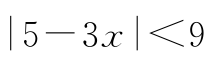

\vert 5 - 3 x \vert < 9


In [17]:
display(train_img['first_absolute_value_1'])
print(train_label['first_absolute_value_1'])

In [19]:
len(train_img.keys()) == len(train_label.keys())

True

In [26]:
# 创建一个大字典，内容为{'file_name': {'image':PIL Image, 'label': text}}
file_name = list(train_img.keys())
image = [train_img[name] for name in file_name]
label = [train_label[name] for name in file_name]

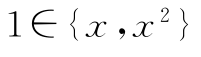

1 \in \left \{ x , x ^ { 2 } \right \}


In [30]:
display(image[100])
print(label[100])

In [31]:
train_dataset = {'name': file_name, 'image': image, 'label': label}

In [32]:
df = Dataset.from_dict(train_dataset)

In [33]:
df

Dataset({
    features: ['name', 'image', 'label'],
    num_rows: 8044
})

In [34]:
df.save_to_disk('./my_data')

Saving the dataset (1/1 shards): 100%|██████████| 8044/8044 [00:00<00:00, 12212.88 examples/s]


In [5]:
val_img_directory = r'C:\Users\EDY\Desktop\AI-team\MFR-printed\pics10K\data\data0508\original_val'
val_label_file = r'C:\Users\EDY\Desktop\AI-team\MFR-printed\pics10K\data\data0508\original_val\val.txt'

In [6]:
val_img = img_dir_2_dict(val_img_directory)
val_label = split_label_dict(val_label_file)

In [8]:
file_name = list(val_img.keys())
image = [val_img[name] for name in file_name]
label = [val_label[name] for name in file_name]

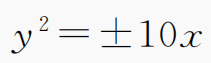

y ^ 2 = \pm 1 0 x


In [10]:
display(image[100])
print(label[100])

In [9]:
val_dataset = {'name': file_name, 'image': image, 'label': label}

In [12]:
df = Dataset.from_dict(val_dataset)
df.save_to_disk('./my_data/val')

Saving the dataset (1/1 shards): 100%|██████████| 2012/2012 [00:00<00:00, 12939.96 examples/s]
